In [1]:
# Using python and machine learning, I used data set from a donor raw data to predict
# which of the prospective donors will contribute in a new camoange.
# This is thesame principle used for "recomendation engines" in big tech and sales companies.
# You use one set of data to predict the out come of a different set of data.

In [1]:
import pandas as pd
import numpy as np # for math computation, EFFICIENT data prep
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # slightly better visuals than matplot

In [ ]:
# first, we import both files but we would be looking at the raw data file first

In [2]:
rawData = pd.read_csv("Donor Raw Data_ML with Python.csv")
prosData =pd.read_csv("Prospective Donor_ML with Python.csv")

In [16]:
%matplotlib inline

#### Quick fire EDA

In [ ]:
# this would be a classification problem I hope

In [3]:
rawData.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [4]:
rawData.shape

(19372, 50)

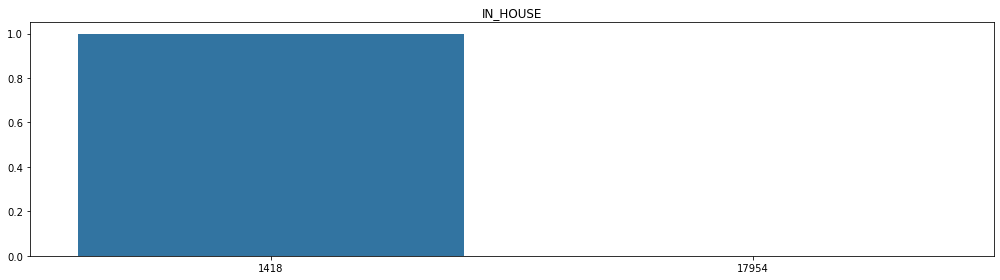

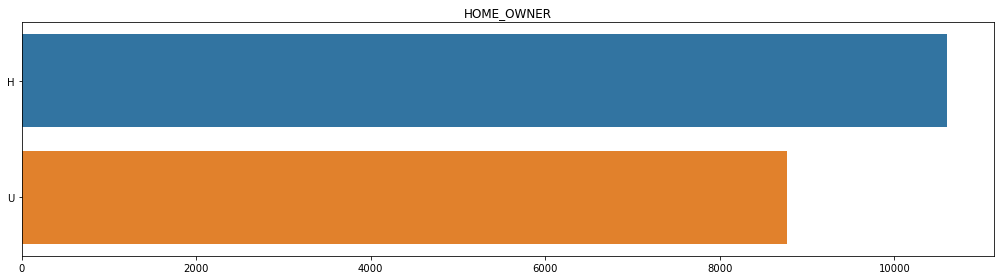

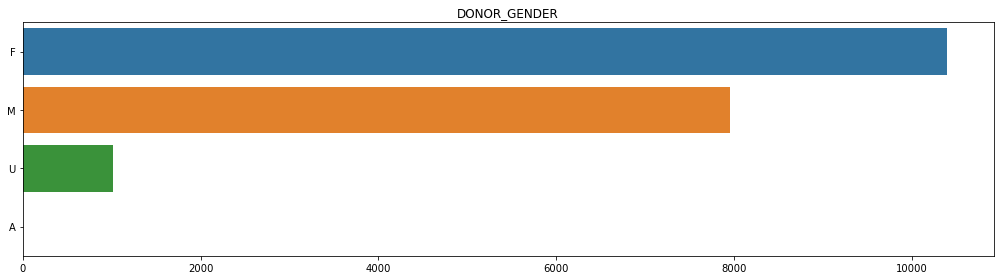

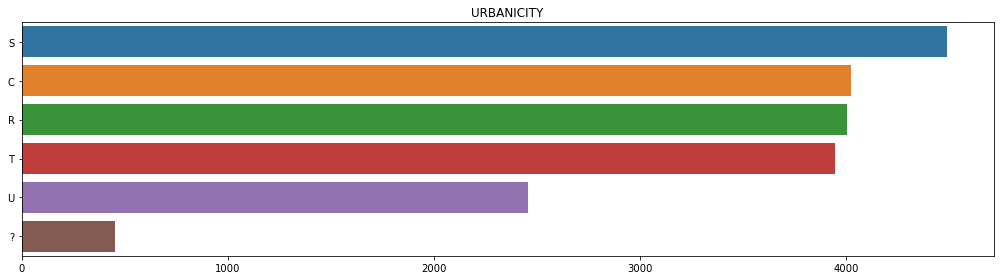

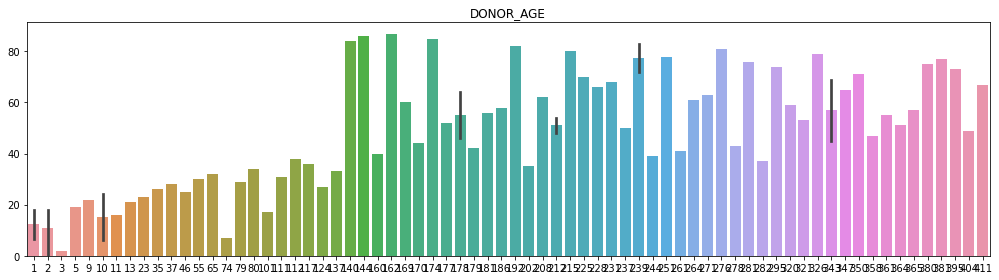

In [17]:
catigorical_variables = ["IN_HOUSE", "HOME_OWNER", "DONOR_GENDER", "URBANICITY", "DONOR_AGE"]
for col in catigorical_variables:
    plt.figure(figsize=(14,4))
    sns.barplot(rawData[col].value_counts().values, rawData[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [3]:
rawData.isnull().sum() 
# we see a lot of missing values and these are too numerous to be deleted
#without affecting the overall data. These would have to be replaced.

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [4]:
rawData.describe()
# we get the mean and median of coulmns which can be used to fill missing values.

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,14980.000000,19372.000000,19372.000000,10562.000000,...,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,3.907543,0.497729,3.361656,5.005397,...,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,1.864796,0.500008,9.503481,2.815386,...,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,2.000000,0.000000,0.000000,3.000000,...,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,4.000000,0.000000,0.000000,5.000000,...,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,241.000000,9.000000,...,997.000000,1000.000000,450.000000,450.000000,17.000000,64.000000,27.000000,260.000000,450.000000,41.000000


In [7]:
#We can see that there are missing fields in 
# DONOR_AGE, INCOME_GROUP, and WEALTH_RATING
#We complete the missing age fields using the median age or 50% value on our ".describe" function.

In [5]:
rawData.DONOR_AGE.replace(np.nan, 60, inplace =True) # i decided to replace the missing values with the mean

rawData.INCOME_GROUP.replace(np.nan, 4, inplace =True) #replacing missing values witht the meadian

rawData.isnull().sum() #quick check, DONOR_AGE & INCOME_GROUP now have no missing values!

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                          0
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                       0
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

<AxesSubplot:>

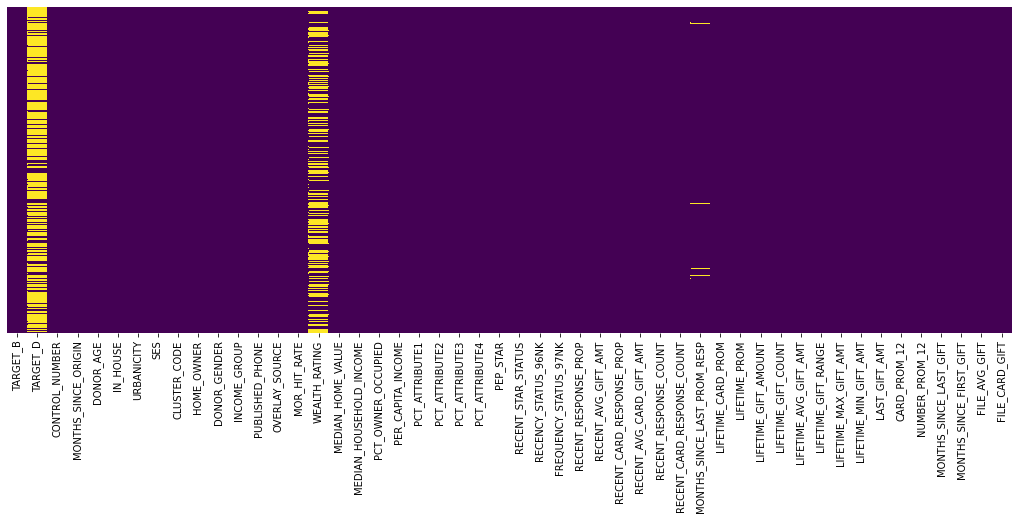

In [10]:
plt.figure(figsize=(18,6))
sns.heatmap(rawData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# I could not see all of the columns so I used seaborn het map to see WEALTH_RATING and fill in
# the missing values(this isn't actually needed and .isnull().sum() already gives me 
# information on missing values)

<AxesSubplot:xlabel='INCOME_GROUP', ylabel='WEALTH_RATING'>

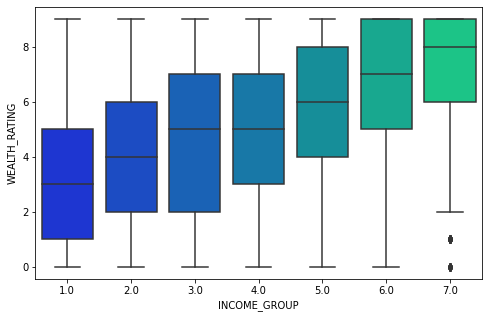

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(y='WEALTH_RATING',x='INCOME_GROUP',data=rawData,palette='winter')

In [ ]:
# looks like the higher the income group, the higher the wealth rating
# and the lower the income group, the lower the wealth rating

In [ ]:
# attempting to use the values from income groups to fill wealth ratings 

In [7]:
def inpute_wealthRat(cols):
    wealthRat = cols[0]
    incomeRat = cols[1]
    
    if pd.isnull(wealthRat):

        if incomeRat == 1:
            return 3

        elif incomeRat == 2:
            return 4
        
        elif incomeRat == 3:
            return 5
        
        elif incomeRat == 4:
            return 5
        
        elif incomeRat == 5:
            return 6
        
        elif incomeRat == 6:
            return 7
        
        else:
            return 8
    else:
        return wealthRat

In [8]:
rawData["WEALTH_RATING"] = rawData[["WEALTH_RATING","INCOME_GROUP"]].apply(inpute_wealthRat,axis=1) 
# applying the result of the function on the file(found this method on stack overflow)

In [9]:
rawData["WEALTH_RATING"].head() #confirming the function was applied correctly

0    4.0
1    3.0
2    9.0
3    4.0
4    5.0
Name: WEALTH_RATING, dtype: float64

In [10]:
#keeping a copy of the data we have worked on so far
rd = rawData.copy()

In [11]:
rd.isnull().sum()

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                          0
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                       0
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                      0
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [ ]:
# next, I delete missing values from MONTHS_SINCE_LAST_PROM_RESP columns.
#compare to the rest of the missing values, this seems negligable....I think

In [12]:
rd.shape

(19372, 50)

In [13]:
dat= rd.drop(["TARGET_D"], axis = 1) #dropping "TARGET_D" column
dat.shape

(19372, 49)

In [14]:
df=dat.dropna()
df.shape
#droping rows with null values, data has new variable, "df"

(19126, 49)

In [15]:
 #number of rows have reduced from 19372 to 19126 after droppng row with null values 

In [16]:
df.isnull().sum() #cheacking of null values have been dropped

TARGET_B                       0
CONTROL_NUMBER                 0
MONTHS_SINCE_ORIGIN            0
DONOR_AGE                      0
IN_HOUSE                       0
URBANICITY                     0
SES                            0
CLUSTER_CODE                   0
HOME_OWNER                     0
DONOR_GENDER                   0
INCOME_GROUP                   0
PUBLISHED_PHONE                0
OVERLAY_SOURCE                 0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOME_VALUE              0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PER_CAPITA_INCOME              0
PCT_ATTRIBUTE1                 0
PCT_ATTRIBUTE2                 0
PCT_ATTRIBUTE3                 0
PCT_ATTRIBUTE4                 0
PEP_STAR                       0
RECENT_STAR_STATUS             0
RECENCY_STATUS_96NK            0
FREQUENCY_STATUS_97NK          0
RECENT_RESPONSE_PROP           0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
RECENT_AVG

In [17]:
#looking at the data in excel, the column "CLUSTER_CODE" has "." as some values.
# can not find the median so I replaced the "." with 0

In [18]:
df["CLUSTER_CODE"].replace(' .',0,inplace = True)

C:\Users\anuma\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [19]:
df["CLUSTER_CODE"].head() #confirming no more "." are in the column

0     0
1    45
2    11
3    04
4    49
Name: CLUSTER_CODE, dtype: object

In [20]:
# we do one hot encode for multiple columns rather than doing this one at a time

In [21]:
rdRaw=pd.get_dummies(data=df, columns=['URBANICITY', 'SES','DONOR_GENDER', 'OVERLAY_SOURCE','HOME_OWNER','RECENCY_STATUS_96NK'])

#####  rdRaw becomes the new variable as we run a one hot encoding

In [22]:
rdRaw.shape #After one hot encoding, we now have 70 columns

(19126, 70)

In [23]:
#keeping a copy of the data we have worked on so far
data = rdRaw.copy()

In [24]:
data.columns

Index(['TARGET_B', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE',
       'IN_HOUSE', 'CLUSTER_CODE', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'FREQUENCY_STATUS_97NK',
       'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
       'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT',
       'FILE_CARD_GIFT'

In [25]:
data.shape

(19126, 70)

In [26]:
# now for the fun part, spliting our data into trainng and test set. I will go for 70-30 split
# 30% training set, 70% test set

In [47]:
RANDOM_STATE = 200 # seed to recreate results fixes random distributions

# Machine Learning Modules from sklearn
from sklearn.linear_model import LogisticRegression # LR algorithm - for CLASSIFICATION

from sklearn.model_selection import train_test_split, GridSearchCV # modules for splitting our data
# and gridsearch for optimizing hyperparameters (scenario analysis) in our iterative ML runs

# performance metrics for machine learning
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, classification_report

# for encoding our data and scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# advanced scaling pipeline
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (n_estimators = 100)
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [48]:
# a) define X (features) and y (target)
X = data.loc[:, data.columns != "TARGET_B"]
y = data["TARGET_B"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [31]:
estimator = LogisticRegression(random_state=RANDOM_STATE)  # STEP 1 set up a machine learning algorithm

estimator.fit(X_train,y_train)# STEP 2 fit the model on the TRAINING set

y_true = y_test # additional step to change variable name change i.e. ground truth

y_pred = estimator.predict(X_test)  # STEP 3: predict using the TEST set FEATURES

# STEP 4: (optional) extract classificiation probabilities in order 
# to construct a ROC curve (later)
y_score = estimator.predict_proba(X_test)[:,0]

C:\Users\anuma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
accuracy_score(y_true, y_pred)

0.7460787730916696

In [50]:
confusion_matrix(y_true,y_pred)

array([[4275,   10],
       [1447,    6]], dtype=int64)

In [51]:
precision_score(y_true,y_pred)

0.375

In [ ]:
# while 74% accuracy may not be perfect and the precision score makes me want to cry, 
# and pull my non exixtet hairs, 
# i cant think of any other way to improve this at the moment so I sadly move on

In [ ]:
#next read the prospectie donor file, 
#and use the model created to get an outcome for the client. Fingers crossed!!

In [35]:
prosData.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,NaN,0,R,2,46,U,F,NaN,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,142,137,NaN,0,R,2,43,U,F,NaN,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,282,17,30.0,0,T,1,35,H,M,6.0,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,368,137,75.0,0,U,1,02,H,M,6.0,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,387,5,NaN,0,T,2,40,U,F,2.0,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2


In [36]:
prosData.isnull().sum()

CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                       529
IN_HOUSE                          0
URBANICITY                        0
SES                               0
CLUSTER_CODE                      0
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                    481
PUBLISHED_PHONE                   0
OVERLAY_SOURCE                    0
MOR_HIT_RATE                      0
WEALTH_RATING                  1006
MEDIAN_HOME_VALUE                 0
MEDIAN_HOUSEHOLD_INCOME           0
PCT_OWNER_OCCUPIED                0
PER_CAPITA_INCOME                 0
PCT_ATTRIBUTE1                    0
PCT_ATTRIBUTE2                    0
PCT_ATTRIBUTE3                    0
PCT_ATTRIBUTE4                    0
PEP_STAR                          0
RECENT_STAR_STATUS                0
RECENCY_STATUS_96NK               0
FREQUENCY_STATUS_97NK             0
RECENT_RESPONSE_PROP              0
RECENT_AVG_GIFT_AMT         

In [ ]:
#As with the precious file, we complete missing fields of
# Donor_Age, Income_Group, Wealth_Rating,Months_Since_Last_Prom_Response

In [37]:
prosData.describe()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,2148.000000,2148.000000,1619.000000,2148.000000,1667.000000,2148.000000,2148.000000,1142.000000,2148.000000,2148.000000,...,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,96146.865456,73.631285,58.185917,0.067970,3.902819,0.493017,3.357076,4.974606,1028.019088,339.798417,...,10.972472,18.595196,7.622723,16.309828,5.331471,12.702514,18.378492,69.681564,12.649097,5.248603
std,54518.044553,41.969403,16.765323,0.251753,1.840627,0.500068,8.585609,2.809815,895.363300,149.754159,...,10.053029,10.874603,7.135016,10.367477,1.251732,4.441983,3.960876,38.325088,7.386101,4.717410
min,139.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,1.000000,3.000000,4.000000,15.000000,1.360000,0.000000
25%,51402.000000,29.000000,46.000000,0.000000,2.000000,0.000000,0.000000,3.000000,508.750000,239.000000,...,5.000000,13.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.130000,2.000000
50%,96092.000000,65.000000,59.000000,0.000000,4.000000,0.000000,0.000000,5.000000,738.500000,314.000000,...,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.290000,4.000000
75%,143196.000000,113.000000,71.000000,0.000000,5.000000,1.000000,3.000000,7.000000,1159.500000,415.000000,...,15.000000,20.000000,10.000000,20.000000,6.000000,13.000000,21.000000,105.000000,15.000000,8.000000
max,191710.000000,137.000000,87.000000,1.000000,7.000000,1.000000,240.000000,9.000000,5982.000000,1500.000000,...,145.000000,150.000000,100.000000,150.000000,13.000000,47.000000,27.000000,187.000000,100.000000,32.000000


In [38]:
prosData.shape

(2148, 48)

In [39]:
prosData.INCOME_GROUP.replace(np.nan, 4, inplace =True)
prosData.WEALTH_RATING.replace(np.nan, 5, inplace =True) # using the median this time not the function used earlier
prosData.DONOR_AGE.replace(np.nan, 59, inplace =True)  #replaced missing values with the mean

In [40]:
prosData['CLUSTER_CODE'].replace(' .',0,inplace = True)

In [41]:
pdd=prosData.dropna() #dropping null values
pdd.shape

(2122, 48)

In [42]:
nd=pd.get_dummies(data=pdd, columns=['URBANICITY', 'SES','DONOR_GENDER', 'OVERLAY_SOURCE','HOME_OWNER','RECENCY_STATUS_96NK'])

#####  nd becomes the new variable as we run a one hot encoding

In [43]:
pdd.shape # new columns added for one hot encoding

(2122, 48)

In [44]:
pdd.isna().sum()

CONTROL_NUMBER                 0
MONTHS_SINCE_ORIGIN            0
DONOR_AGE                      0
IN_HOUSE                       0
URBANICITY                     0
SES                            0
CLUSTER_CODE                   0
HOME_OWNER                     0
DONOR_GENDER                   0
INCOME_GROUP                   0
PUBLISHED_PHONE                0
OVERLAY_SOURCE                 0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOME_VALUE              0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PER_CAPITA_INCOME              0
PCT_ATTRIBUTE1                 0
PCT_ATTRIBUTE2                 0
PCT_ATTRIBUTE3                 0
PCT_ATTRIBUTE4                 0
PEP_STAR                       0
RECENT_STAR_STATUS             0
RECENCY_STATUS_96NK            0
FREQUENCY_STATUS_97NK          0
RECENT_RESPONSE_PROP           0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
RECENT_AVG_CARD_GIFT_AMT       0
RECENT_RES

In [45]:
# now to predict the outcome for the new data

In [52]:
prediction = pd.Series(rf.predict(X))
prospective_donnors = pdd[['CONTROL_NUMBER']]
prospective_donnors['prediction']= prediction

<ipython-input-52-6a4797adb104>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prospective_donnors['prediction']= prediction


In [53]:
prediction  # getting list of prospective donors and those likely not to donate

0        0
1        1
2        0
3        0
4        0
        ..
19121    0
19122    0
19123    0
19124    0
19125    1
Length: 19126, dtype: int64

In [54]:
accuracy = rf.score(X, y)

In [55]:
accuracy

0.9245529645508731

In [ ]:
# test sample gave a 74% accuracy and the prospective data gave 92%